In [1]:
!pip install quantecon-book-networks pandas-datareader

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import quantecon as qe

import matplotlib.cm as cm
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.data as qbn_data

import matplotlib.patches as mpatches

/Users/humphreyyang/anaconda3/envs/quantecon/lib/python3.9/site-packages/quantecon_book_networks/data.py:111: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exporters = crude_oil.groupby(by=["location_code"]).sum().sort_values("export_value", ascending=False)[:10].index
/Users/humphreyyang/anaconda3/envs/quantecon/lib/python3.9/site-packages/quantecon_book_networks/data.py:113: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  importers = crude_oil.groupby(by=["partner_code"]).sum().sort_values("export_value", ascending=False)[:21].index
/Users/humphreyyang/anaconda3/envs/quantecon/lib/python3.9/site-packages/quan

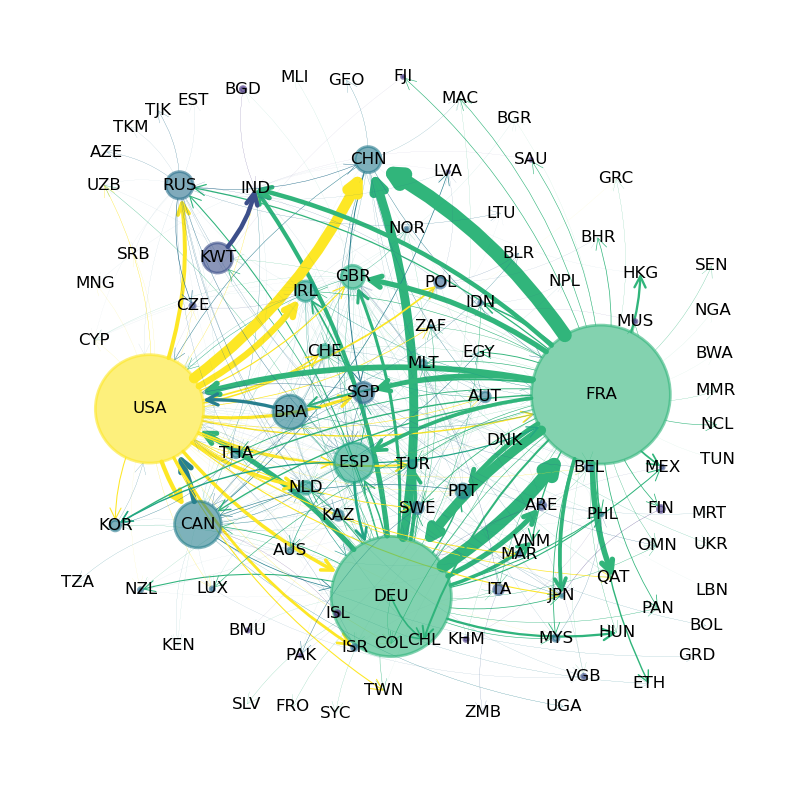

In [3]:
ch1_data = qbn_data.introduction()
export_figures = False

DG = ch1_data['aircraft_network_2019']
pos = ch1_data['aircraft_network_2019_pos']

centrality = nx.eigenvector_centrality(DG)
node_total_exports = qbn_io.node_total_exports(DG)
edge_weights = qbn_io.edge_weights(DG)

node_pos_dict = pos

node_sizes = qbn_io.normalise_weights(node_total_exports,10000)
edge_widths = qbn_io.normalise_weights(edge_weights,10)

node_colors = qbn_io.colorise_weights(list(centrality.values()),color_palette=cm.viridis)
node_to_color = dict(zip(DG.nodes,node_colors))
edge_colors = []
for src,_ in DG.edges:
    edge_colors.append(node_to_color[src])

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

nx.draw_networkx_nodes(DG,
                       node_pos_dict,
                       node_color=node_colors,
                       node_size=node_sizes,
                       linewidths=2,
                       alpha=0.6,
                       ax=ax)

nx.draw_networkx_labels(DG,
                        node_pos_dict,
                        ax=ax)

nx.draw_networkx_edges(DG,
                       node_pos_dict,
                       edge_color=edge_colors,
                       width=edge_widths,
                       arrows=True,
                       arrowsize=20,
                       ax=ax,
                       arrowstyle='->',
                       node_size=node_sizes,
                       connectionstyle='arc3,rad=0.15')

plt.show()

In [4]:
G_p = nx.DiGraph()

In [5]:
edge_list = [('p', 'p'),
             ('m', 'p'), ('m', 'm'), ('m', 'r'),
             ('r', 'p'), ('r', 'm'), ('r', 'r')]

In [6]:
for e in edge_list:
    u, v = e
    G_p.add_edge(u, v)

In [7]:
G_p.add_edges_from(edge_list)

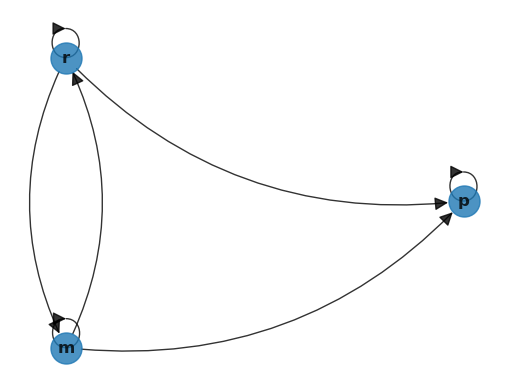

In [8]:
fig, ax = plt.subplots()
nx.draw_spring(G_p, ax=ax, node_size=500, with_labels=True,
               font_weight='bold', arrows=True, alpha=0.8,
               connectionstyle='arc3,rad=0.25', arrowsize=20)
plt.show()

In [9]:
G_p.in_degree('p')

3

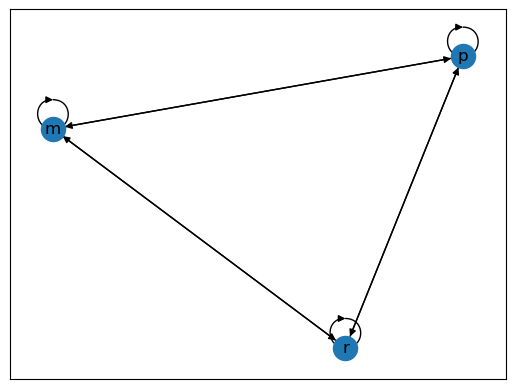

In [10]:
fig, ax = plt.subplots()
G1 = nx.DiGraph()

G1.add_edges_from([('p', 'p'),('p','m'),('p','r'),
             ('m', 'p'), ('m', 'm'), ('m', 'r'),
             ('r', 'p'), ('r', 'm'), ('r', 'r')])

nx.draw_networkx(G1, with_labels = True)

In [11]:
nx.is_strongly_connected(G1)    #checking if above graph is strongly connected

True

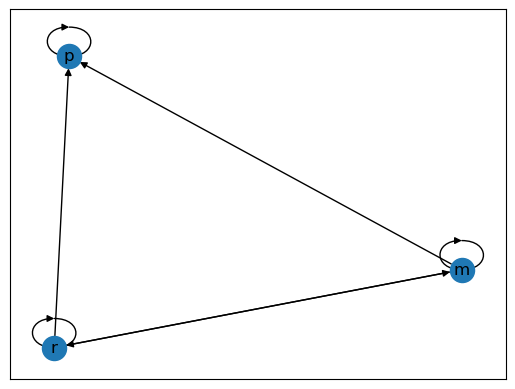

In [12]:
fig, ax = plt.subplots()
G2 = nx.DiGraph()

G2.add_edges_from([('p', 'p'),
             ('m', 'p'), ('m', 'm'), ('m', 'r'),
             ('r', 'p'), ('r', 'm'), ('r', 'r')])

nx.draw_networkx(G2, with_labels = True)

In [13]:
nx.is_strongly_connected(G2)    #checking if above graph is strongly connected

False

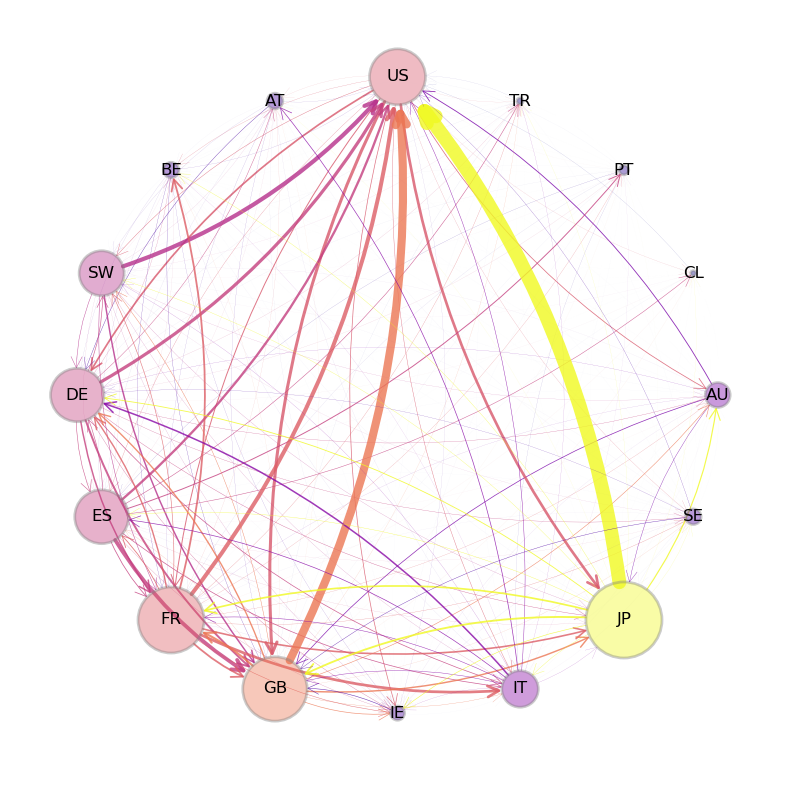

In [14]:
Z = ch1_data["adjacency_matrix_2019"]["Z"]
Z_visual= ch1_data["adjacency_matrix_2019"]["Z_visual"]
countries = ch1_data["adjacency_matrix_2019"]["countries"]

G = qbn_io.adjacency_matrix_to_graph(Z_visual, countries, tol=0.03)

centrality = qbn_io.eigenvector_centrality(Z_visual, authority=False)
node_total_exports = qbn_io.node_total_exports(G)
edge_weights = qbn_io.edge_weights(G)

node_pos_dict = nx.circular_layout(G)

node_sizes = qbn_io.normalise_weights(node_total_exports,3000)
edge_widths = qbn_io.normalise_weights(edge_weights,10)


node_colors = qbn_io.colorise_weights(centrality)
node_to_color = dict(zip(G.nodes,node_colors))
edge_colors = []
for src,_ in G.edges:
    edge_colors.append(node_to_color[src])

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

nx.draw_networkx_nodes(G,
                       node_pos_dict,
                       node_color=node_colors,
                       node_size=node_sizes,
                       edgecolors='grey',
                       linewidths=2,
                       alpha=0.4,
                       ax=ax)

nx.draw_networkx_labels(G,
                        node_pos_dict,
                        font_size=12,
                        ax=ax)

nx.draw_networkx_edges(G,
                       node_pos_dict,
                       edge_color=edge_colors,
                       width=edge_widths,
                       arrows=True,
                       arrowsize=20,
                       alpha=0.8,
                       ax=ax,
                       arrowstyle='->',
                       node_size=node_sizes,
                       connectionstyle='arc3,rad=0.15')

plt.show()

In [15]:
A = ((0.9, 0.1, 0.0),
     (0.4, 0.4, 0.2),
     (0.1, 0.1, 0.8))
A = np.array(A)
G = qe.DiGraph(A, weighted=True)    # store weights

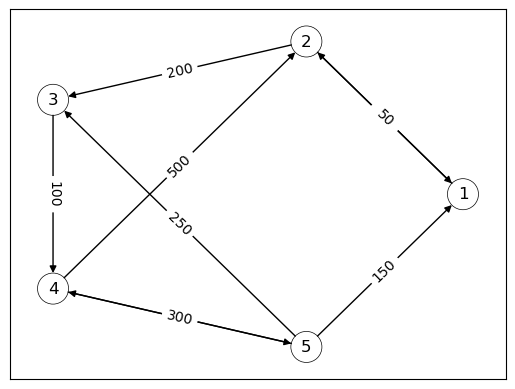

In [16]:
G4 = nx.DiGraph()

G4.add_edges_from([('1','2'),
                   ('2','1'),('2','3'),
                   ('3','4'),
                   ('4','2'),('4','5'),
                   ('5','1'),('5','3'),('5','4')])
pos = nx.circular_layout(G4)

edge_labels={('1','2'): '100',
             ('2','1'): '50', ('2','3'): '200',
             ('3','4'): '100',
             ('4','2'): '500', ('4','5'): '50',
             ('5','1'): '150',('5','3'): '250', ('5','4'): '300'}

nx.draw_networkx(G4, pos, node_color = 'none',node_size = 500)
nx.draw_networkx_edge_labels(G4, pos, edge_labels=edge_labels)
nx.draw_networkx_nodes(G4, pos, linewidths= 0.5, edgecolors = 'black',
                       node_color = 'none',node_size = 500)

plt.show()

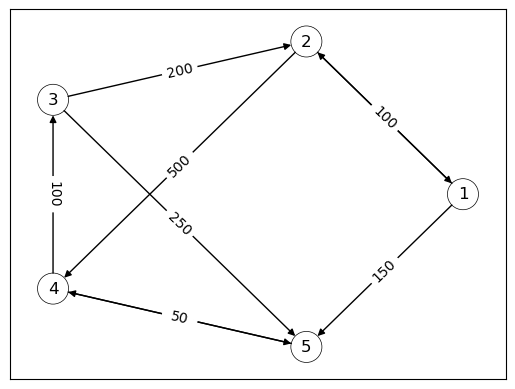

In [17]:
G5 = nx.DiGraph()

G5.add_edges_from([('1','2'),('1','5'),
                   ('2','1'),('2','4'),
                   ('3','2'),('3','5'),
                   ('4','3'),('4','5'),
                   ('5','4')])

edge_labels={('1','2'): '50', ('1','5'): '150',
             ('2','1'): '100', ('2','4'): '500',
             ('3','2'): '200', ('3','5'): '250',
             ('4','3'): '100', ('4','5'): '300',
             ('5','4'): '50'}

nx.draw_networkx(G5, pos, node_color = 'none',node_size = 500)
nx.draw_networkx_edge_labels(G5, pos, edge_labels=edge_labels)
nx.draw_networkx_nodes(G5, pos, linewidths= 0.5, edgecolors = 'black',
                       node_color = 'none',node_size = 500)

plt.show()

In [18]:
G6 = nx.DiGraph()

G6.add_edges_from([('1','2'),('1','3'),
                   ('2','1'),
                   ('3','1'),('3','2')])

In [19]:
A = np.array([[0,0.7,0.3],    # adjacency matrix A
              [1,0,0],
              [0.4,0.6,0]])

In [20]:
def is_irreducible(P):
    n = len(P)
    result = np.zeros((n, n))
    for i in range(n):
        result += np.linalg.matrix_power(P, i)
    return np.all(result > 0)

In [21]:
is_irreducible(A)      # check irreducibility of A

True

In [22]:
nx.is_strongly_connected(G6)      # check connectedness of graph

True

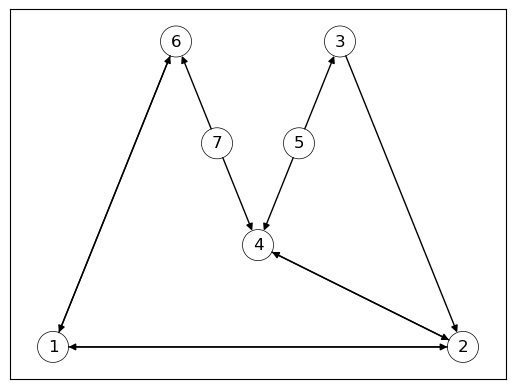

In [23]:
G7 = nx.DiGraph()

G7.add_nodes_from(['1','2','3','4','5','6','7'])

G7.add_edges_from([('1','2'),('1','6'),
                   ('2','1'),('2','4'),
                   ('3','2'),
                   ('4','2'),
                   ('5','3'),('5','4'),
                   ('6','1'),
                   ('7','4'),('7','6')])
pos = nx.planar_layout(G7)

nx.draw_networkx(G7, pos, node_color='none', node_size=500)
nx.draw_networkx_nodes(G7, pos, linewidths=0.5, edgecolors='black',
                       node_color='none',node_size=500)

plt.show()

In [24]:
iG7 = [G7.in_degree(v) for v in G7.nodes()]   # computing in-degree centrality

for i, d in enumerate(iG7):
    print(i+1, d)

1 2
2 3
3 1
4 3
5 0
6 2
7 0


In [25]:
D = qbn_io.build_unweighted_matrix(Z)
indegree = D.sum(axis=0)

In [26]:
def centrality_plot_data(countries, centrality_measures):
    df = pd.DataFrame({'code': countries,
                       'centrality':centrality_measures,
                       'color': qbn_io.colorise_weights(centrality_measures).tolist()
                       })
    return df.sort_values('centrality')

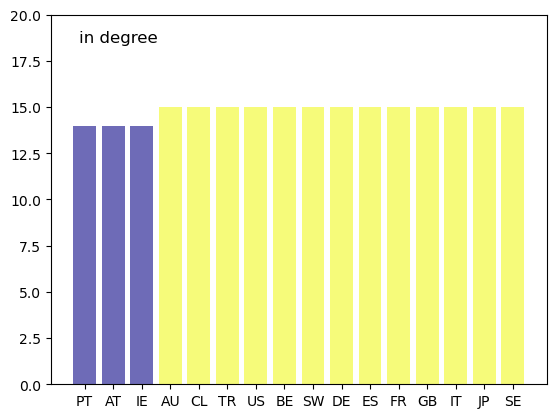

In [27]:
fig, ax = plt.subplots()

df = centrality_plot_data(countries, indegree)

ax.bar('code', 'centrality', data=df, color=df["color"], alpha=0.6)

patch = mpatches.Patch(color=None, label='in degree', visible=False)
ax.legend(handles=[patch], fontsize=12, loc="upper left", handlelength=0, frameon=False)

ax.set_ylim((0,20))

plt.show()

In [28]:
def eigenvector_centrality(A, k=40, authority=False):
    """
    Computes the dominant eigenvector of A. Assumes A is
    primitive and uses the power method.

    """
    A_temp = A.T if authority else A
    n = len(A_temp)
    r = np.max(np.abs(np.linalg.eigvals(A_temp)))
    e = r**(-k) * (np.linalg.matrix_power(A_temp, k) @ np.ones(n))
    return e / np.sum(e)

In [29]:
A = nx.to_numpy_array(G7)         # compute adjacency matrix of graph

In [30]:
e = eigenvector_centrality(A)
n = len(e)

for i in range(n):
    print(i+1,e[i])

1 0.18580570704268035
2 0.18580570704268035
3 0.11483424225608216
4 0.11483424225608216
5 0.14194292957319637
6 0.11483424225608216
7 0.14194292957319637


In [31]:
eig_central = eigenvector_centrality(Z)

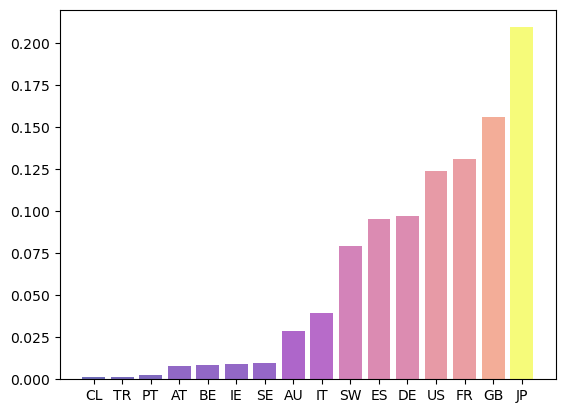

In [32]:
fig, ax = plt.subplots()

df = centrality_plot_data(countries, eig_central)

ax.bar('code', 'centrality', data=df, color=df["color"], alpha=0.6)

patch = mpatches.Patch(color=None, visible=False)
ax.legend(handles=[patch], fontsize=12, loc="upper left", handlelength=0, frameon=False)

plt.show()

In [33]:
ecentral_authority = eigenvector_centrality(Z, authority=True)

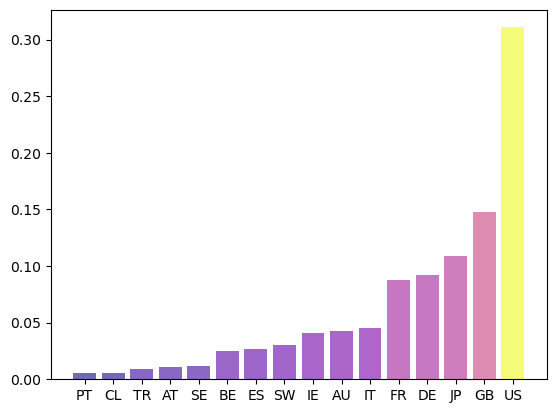

In [34]:
fig, ax = plt.subplots()

df = centrality_plot_data(countries, ecentral_authority)

ax.bar('code', 'centrality', data=df, color=df["color"], alpha=0.6)

patch = mpatches.Patch(color=None, visible=False)
ax.legend(handles=[patch], fontsize=12, loc="upper left", handlelength=0, frameon=False)

plt.show()

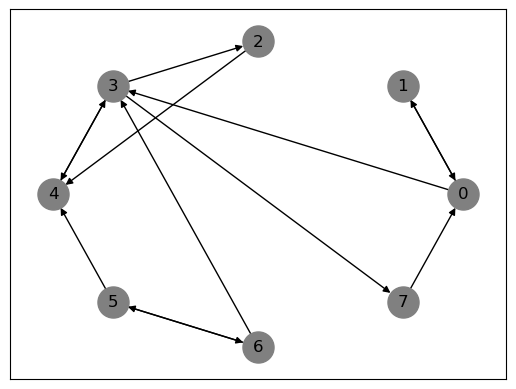

In [35]:
# First, let's plot the given graph

G = nx.DiGraph()

G.add_nodes_from(np.arange(8))  # adding nodes

G.add_edges_from([(0,1),(0,3),       # adding edges
                  (1,0),
                  (2,4),
                  (3,2),(3,4),(3,7),
                  (4,3),
                  (5,4),(5,6),
                  (6,3),(6,5),
                  (7,0)])

nx.draw_networkx(G, pos=nx.circular_layout(G), node_color='gray', node_size=500, with_labels=True)

plt.show()

In [36]:
A = nx.to_numpy_array(G)      #find adjacency matrix associated with G

A

array([[0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [37]:
oG = [G.out_degree(v) for v in G.nodes()]   # computing in-degree centrality

for i, d in enumerate(oG):
    print(i, d)

0 2
1 1
2 1
3 3
4 1
5 2
6 2
7 1


In [38]:
e = eigenvector_centrality(A)   # computing eigenvector centrality
n = len(e)

for i in range(n):
    print(i+1, e[i])

1 0.1458980838002507
2 0.09016989800748738
3 0.055728056024793506
4 0.14589810100962303
5 0.09016994824024989
6 0.1803397955498566
7 0.20162621936025152
8 0.09016989800748738


In [39]:
def is_accessible(G,i,j):
    A = nx.to_numpy_array(G)
    n = len(A)
    result = np.zeros((n, n))
    for i in range(n):
        result += np.linalg.matrix_power(A, i)
    if result[i,j]>0:
        return True
    else:
        return False

In [40]:
G = nx.DiGraph()

G.add_nodes_from(np.arange(8))  # adding nodes

G.add_edges_from([(0,1),(0,3),       # adding edges
                  (1,0),
                  (2,4),
                  (3,2),(3,4),(3,7),
                  (4,3),
                  (5,4),(5,6),
                  (6,3),(6,5),
                  (7,0)])

In [41]:
is_accessible(G, 2, 1)

True

In [42]:
is_accessible(G, 3, 6)

False